# Telangana Crop Health Challenge complete flow

This notebook contains the GEE image download process for train and test data given for competion. Following steps are guide to download Sentinel-2 image bands from GEE account within project.

- Collect csv files for training and testing
- Convert geometry for AOI in GEE and convert date format as start end date required for GEE 
- Script in scr file source to follow all steps to connect and download image and save local in .tif format

## Data Download from Google Earth Engine

### Download Train & Test dataset 

In [1]:
import os 
import numpy as np 
import pandas as pd
from shapely import wkt
import geopandas as gpd

os.chdir('/Users/kaushalk/Desktop/open_projects/Telengana_Crop_Health')
# Add the 'src' directory to the Python path
from src.gee_download import main, format_date, process_row

In [3]:
!ls data/raw

Test.csv             db.sqlite3           gee_downloads_test
Train.csv            gee_downloads_sample gee_downloads_train


In [5]:
# Online storage path 
train_data_path = "https://api.zindi.africa/v1/competitions/telangana-crop-health-challenge/files/Train.csv?auth_token=zus.v1.r9SLXZb.BjkGgVGb5BPeUq9JbM7Sjx7meYQ6t7"
test_data_path = "https://api.zindi.africa/v1/competitions/telangana-crop-health-challenge/files/Test.csv?auth_token=zus.v1.r9SLXZb.BjkGgVGb5BPeUq9JbM7Sjx7meYQ6t7"

# Local Saved file
DATA_DIR = 'data/'
train_df = pd.read_csv(DATA_DIR+ 'raw/Train.csv')
test_df = pd.read_csv(DATA_DIR+ 'raw/Test.csv')
# Change geometry to wkt format
train_df['geometry'] = train_df['geometry'].apply(wkt.loads)
test_df['geometry'] = test_df['geometry'].apply(wkt.loads)


In [7]:
train_df.head()

,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry
0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-25 0:00:00,2024-04-14 0:00:00,97,54,Pea,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,POLYGON ((78.18143246076087 17.978884603571068...
1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-13 0:00:00,2024-04-26 0:00:00,82,58,Pea,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,POLYGON ((78.17545177547453 17.981074445477304...
2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-12-19 0:00:00,2024-04-28 0:00:00,92,91,Pea,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,POLYGON ((78.16914224770792 17.976212849967755...
3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-02-11 0:00:00,2024-11-04 0:00:00,91,52,Pea,Lentil,Transplanting,Flood,Canal,5,92,16,Rabi,POLYGON ((78.16889103841902 17.974608186550842...
4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-12-12 0:00:00,2024-05-19 0:00:00,94,55,Pea,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,POLYGON ((78.17264452998072 17.969251496349454...


### Download GEE S2 Image for train set

In [5]:
# Define input parameters to download S2 image
gee_test_outs_folder = 'data/raw/gee_downloads_train/'
test_s2_filename = 'train_s2_datapath.csv'
start_date_col = "SDate"
end_date_col = "HDate"
scale_factor = 2

# Run the main function to download images
main(
    df=train_df,
    filename = test_s2_filename,
    output_folder=gee_test_outs_folder,
    start_date_col=start_date_col,
    end_date_col=end_date_col,
    scale_factor = scale_factor,
    download=True
)

/opt/anaconda3/envs/geoai/lib/python3.10/site-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2

  warnings.warn(warning, category=DeprecationWarning)


File already exists, skipping download: data/raw/gee_downloads_train//20240425T051649_20240425T052817_T43QHV_RGB_2023-11-13_2024-04-26.tif
File already exists, skipping download: data/raw/gee_downloads_train//20240412T050649_20240412T051727_T43QHV_RGB_2023-11-25_2024-04-14.tif
File already exists, skipping download: data/raw/gee_downloads_train//20240517T050651_20240517T051655_T43QHV_RGB_2023-12-12_2024-05-19.tifFile already exists, skipping download: data/raw/gee_downloads_train//20241103T050951_20241103T052004_T43QHV_RGB_2023-02-11_2024-11-04.tif

File already exists, skipping download: data/raw/gee_downloads_train//20240427T050651_20240427T051439_T43QHV_RGB_2023-12-19_2024-04-28.tif
File already exists, skipping download: data/raw/gee_downloads_train//20240402T050649_20240402T051718_T43QHV_RGB_2023-12-14_2024-04-04.tif
File already exists, skipping download: data/raw/gee_downloads_train//20240527T050651_20240527T051452_T43QHV_RGB_2023-11-20_2024-05-30.tif
File already exists, skippi

In [6]:
pd.read_csv('data/raw/gee_downloads_train/train_s2_datapath.csv')

,FarmID,category,Crop,State,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,...,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,geometry,tif_path
0,1326576,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-25 0:00:00,2024-04-14 0:00:00,97,54,...,Lentil,Transplanting,Flood,Groundwater,4,87,17,Rabi,POLYGON ((78.18127248427754 17.978906389284404...,data/raw/gee_downloads_train//20240412T050649_...
1,1326577,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-11-13 0:00:00,2024-04-26 0:00:00,82,58,...,Lentil,Transplanting,Flood,Canal,5,94,15,Rabi,"POLYGON ((78.1752973813341 17.981183044327867,...",data/raw/gee_downloads_train//20240425T051649_...
2,1326578,Healthy,Paddy,Telangana,Medak,Kulcharam,2023-12-19 0:00:00,2024-04-28 0:00:00,92,91,...,Lentil,Transplanting,Flood,Canal,3,99,20,Rabi,"POLYGON ((78.1690778768782 17.976341515390775,...",data/raw/gee_downloads_train//20240427T050651_...
3,1331836,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-02-11 0:00:00,2024-11-04 0:00:00,91,52,...,Lentil,Transplanting,Flood,Canal,5,92,16,Rabi,POLYGON ((78.16872276852166 17.974628668280985...,data/raw/gee_downloads_train//20241103T050951_...
4,1326579,Diseased,Paddy,Telangana,Medak,Kulcharam,2023-12-12 0:00:00,2024-05-19 0:00:00,94,55,...,Lentil,Transplanting,Flood,Canal,5,97,20,Rabi,POLYGON ((78.17259454733667 17.969343859503397...,data/raw/gee_downloads_train//20240517T050651_...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7883,166176,Healthy,Cotton,Telangana,Adilabad,Bela,2023-01-05 0:00:00,2023-09-30 0:00:00,78,81,...,Maize,Broadcasting,Drip,Tubewell,2,60,18,Kharif,POLYGON ((78.79203446673357 19.736025060281435...,data/raw/gee_downloads_train//20230925T050659_...
7884,1313289,Healthy,Cotton,Telangana,Adilabad,Bela,2023-05-24 0:00:00,2023-09-11 0:00:00,81,110,...,Maize,Seed Drilling,Drip,Rainfed,3,45,11,Kharif,POLYGON ((78.79720443460869 19.754175532955873...,data/raw/gee_downloads_train//20230910T050701_...
7885,1298256,Healthy,Cotton,Telangana,Adilabad,Bela,2023-06-06 0:00:00,2023-12-30 0:00:00,68,66,...,Sorghum,Broadcasting,Sprinkler,Canal,3,58,14,Kharif,POLYGON ((78.80750011425688 19.754607150933307...,data/raw/gee_downloads_train//20231229T051221_...
7886,1323180,Healthy,Cotton,Telangana,Adilabad,Bela,2023-05-15 0:00:00,2023-09-20 0:00:00,84,101,...,Sorghum,Broadcasting,Drip,Rainfed,3,52,20,Kharif,POLYGON ((78.80897804406094 19.753540944359646...,data/raw/gee_downloads_train//20230915T050659_...


### Download S2 Images for test set

In [5]:
# Define input parameters to download S2 image
gee_test_outs_folder = 'data/raw/gee_downloads_test/'
test_s2_filename = 'test_s2_datapath.csv'
start_date_col = "SDate"
end_date_col = "HDate"
scale_factor = 2

# Run the main function to download images
main(
    df=test_df,
    filename = test_s2_filename,
    output_folder=gee_test_outs_folder,
    start_date_col=start_date_col,
    end_date_col=end_date_col,
    scale_factor = scale_factor,
    download=True
)

/opt/anaconda3/envs/geoai/lib/python3.10/site-packages/ee/deprecation.py:207: DeprecationWarning: 

Attention required for COPERNICUS/S2! You are using a deprecated asset.
To ensure continued functionality, please update it.
Learn more: https://developers.google.com/earth-engine/datasets/catalog/COPERNICUS_S2

  warnings.warn(warning, category=DeprecationWarning)


File already exists, skipping download: data/raw/gee_downloads_test//20240517T050651_20240517T051655_T43QHA_RGB_2023-11-29_2024-05-18.tif
File already exists, skipping download: data/raw/gee_downloads_test//20240422T050649_20240422T051633_T43QHA_RGB_2023-04-11_2024-04-25.tif
File already exists, skipping download: data/raw/gee_downloads_test//20240422T050649_20240422T051633_T43QHA_RGB_2023-01-11_2024-04-27.tif
File already exists, skipping download: data/raw/gee_downloads_test//20240512T050649_20240512T051901_T44QKE_RGB_2023-11-12_2024-05-14.tif
File already exists, skipping download: data/raw/gee_downloads_test//20240527T050651_20240527T051452_T44QKE_RGB_2023-12-20_2024-05-28.tif
File already exists, skipping download: data/raw/gee_downloads_test//20240517T050651_20240517T051655_T43QHA_RGB_2023-12-30_2024-05-22.tif
File already exists, skipping download: data/raw/gee_downloads_test//20240522T050649_20240522T051545_T43QHA_RGB_2023-11-16_2024-05-24.tif
File already exists, skipping down

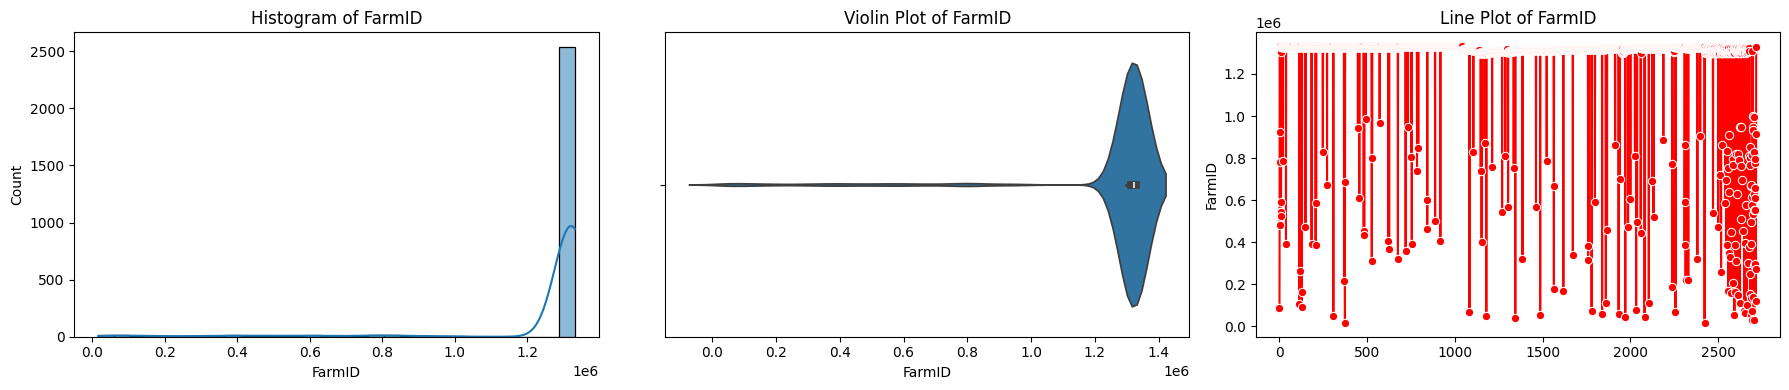

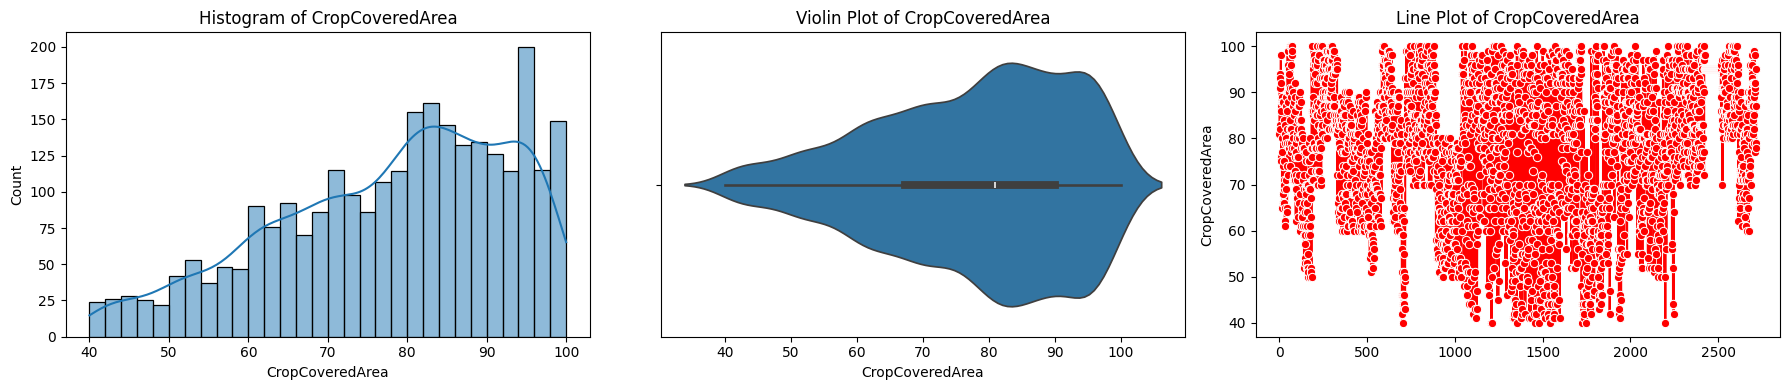

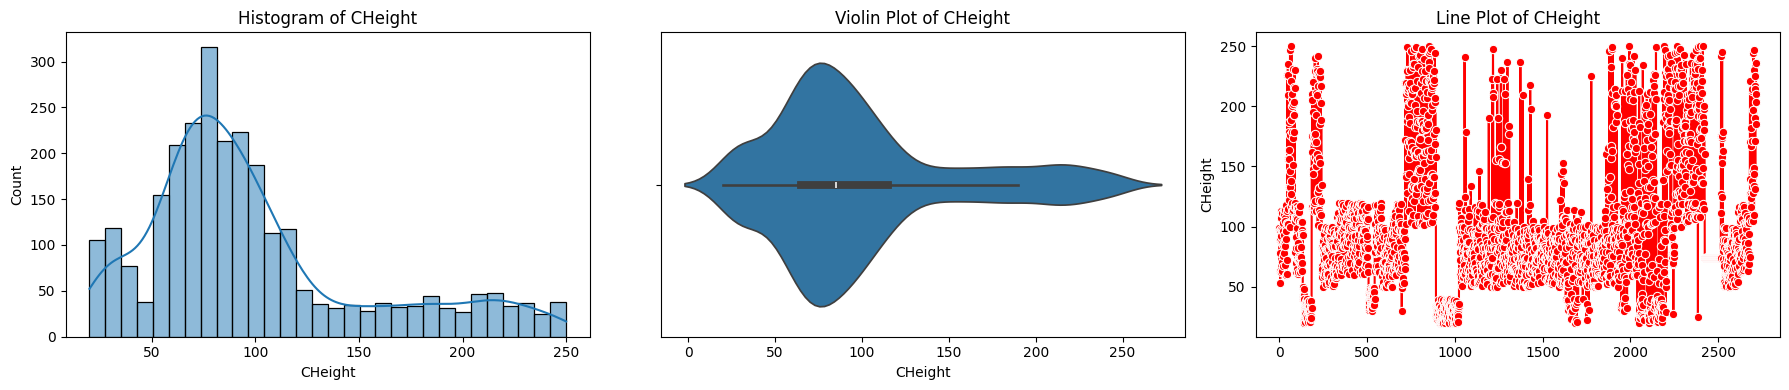

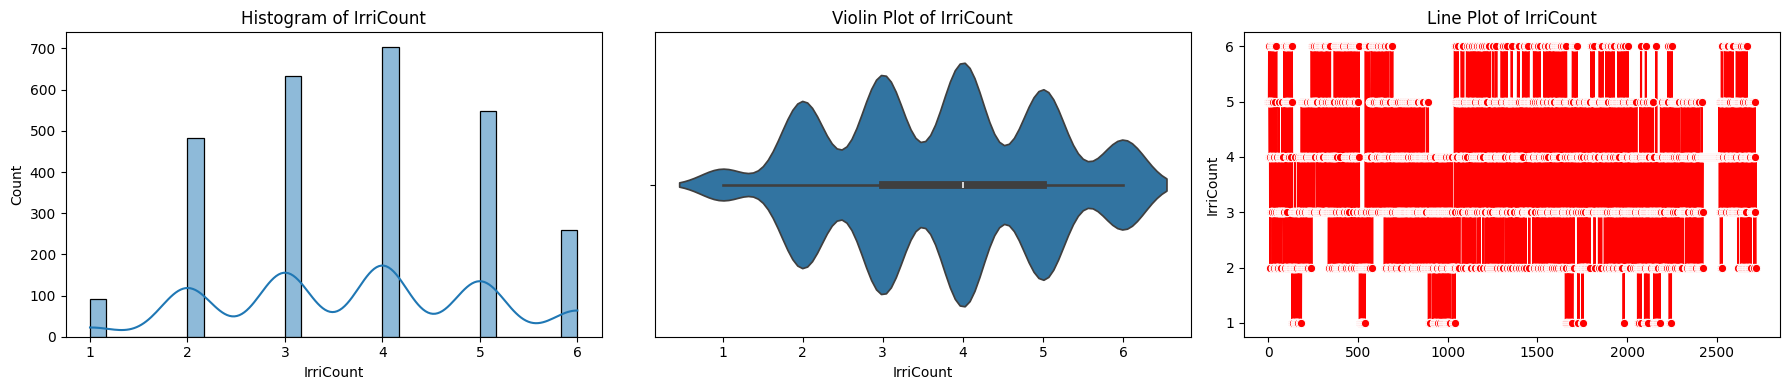

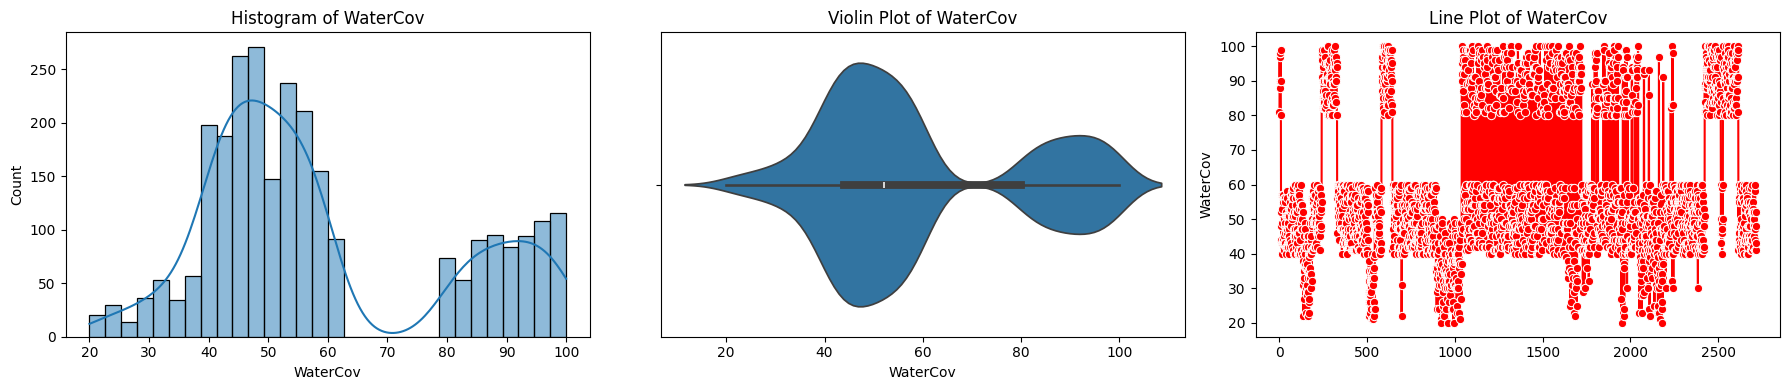

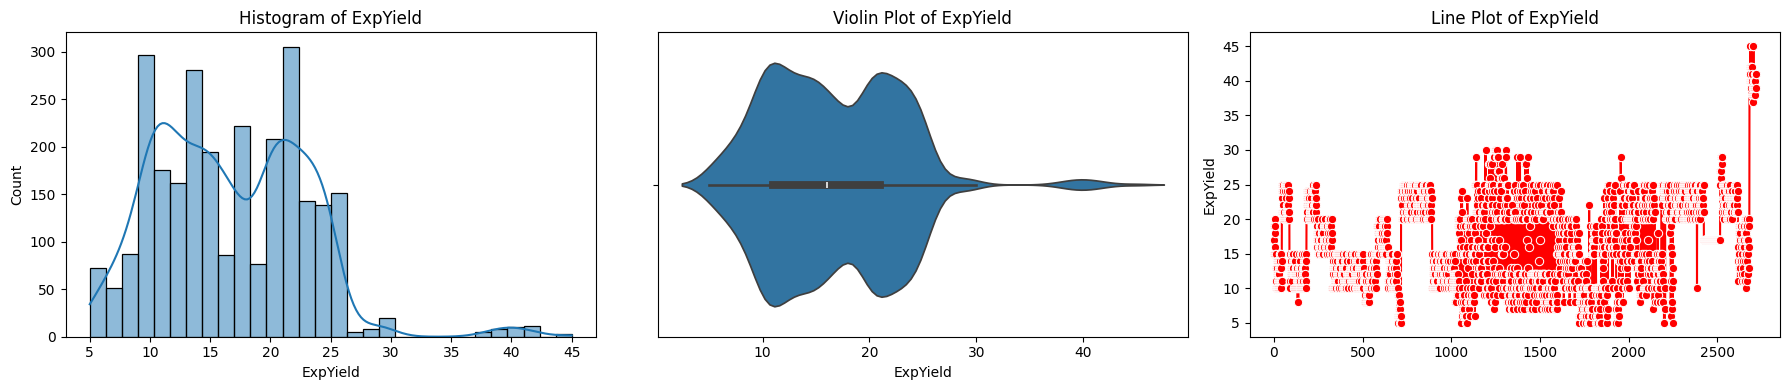

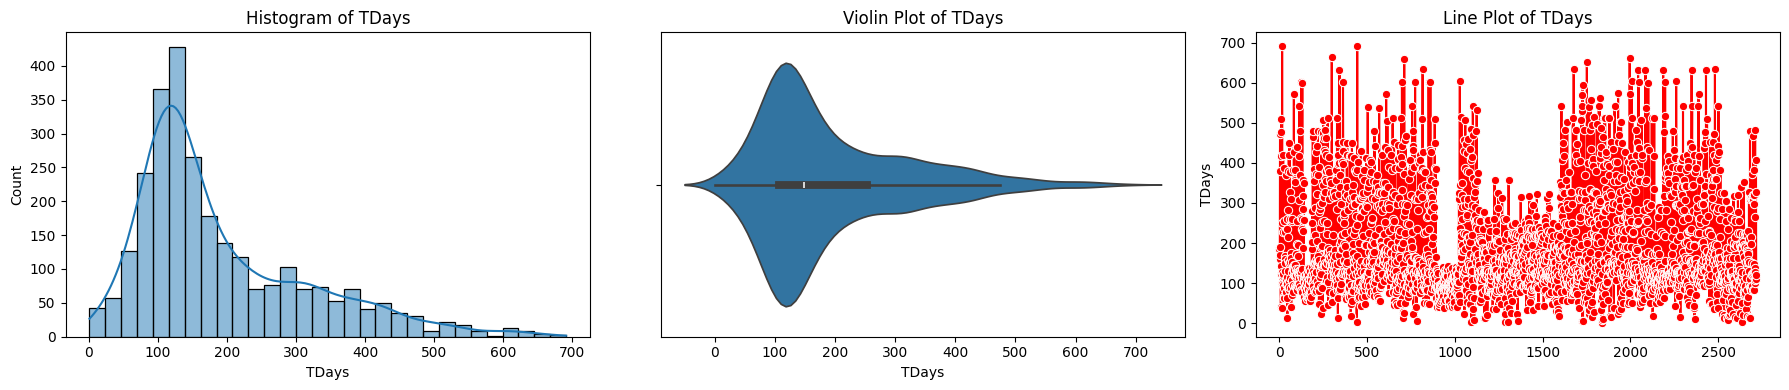

In [58]:
plot_numerical_distributions(test_df)